BASIC TERMINOLOGIES : 
1. what is EDA
2. Data-point/ vector
3. Data set
4. Features/variable/input-variable/Independent-varaible
5. Label / Dependent-variable/ Output-variable/Class/Class-label

We will see about IRIS data set. This is a simple data set of 3 flowers. 1. IRIS Setosa 2. IRIS Versicolor 3. IRIS verginica

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

iris = pd.read_csv('iris.csv')

In [5]:
# How many data-points and features ? 
print(iris.shape)

(150, 5)


In [6]:
# What are the column names in Data set
print(iris.columns)

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')


In [7]:
#How many datapoints for each class are present ?
# or How many flowers for each species are present ?
iris['variety'].value_counts()

#iris data set is balanced dataset as each class have equal data points.

Versicolor    50
Virginica     50
Setosa        50
Name: variety, dtype: int64

# 2-D scatter plot

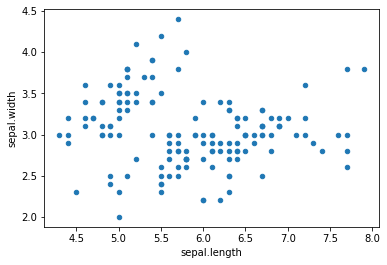

In [8]:
# 2-D scatter plot : 
#Always understand the axis : labels and scale

iris.plot(kind = "scatter", x = 'sepal.length', y = 'sepal.width');
plt.show()

/Users/himanshupatel/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


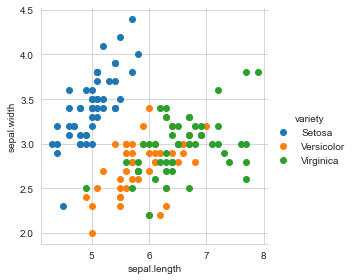

In [9]:
#2-D scatter plot with color-coding for each flower type/class.
#here sns corresponds to seaborn.
sns.set_style("whitegrid");
sns.FacetGrid(iris, hue = "variety", size = 4) \
   .map(plt.scatter, "sepal.length", "sepal.width") \
   .add_legend();
plt.show()

# Observation(s) :

1. Using sepal length and sepal width fetures we can distiguish setosa flowers from others.
2. Seperating Versicolor from Verginic is much harder as they have considerable overlap.

# 3-D scatter plot
Needs a lot of mouse interaction to interpret data.
What about 4-D, 5-D, or n-D scatter plot?

# Pair-Plot
As we humans are not able to imagine more than 3-D plot. We need some method to visualize higher dimensional data. We use pair plot. In pair plot we make pairs of every features with every other feature. And then we examine the plots.


/Users/himanshupatel/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


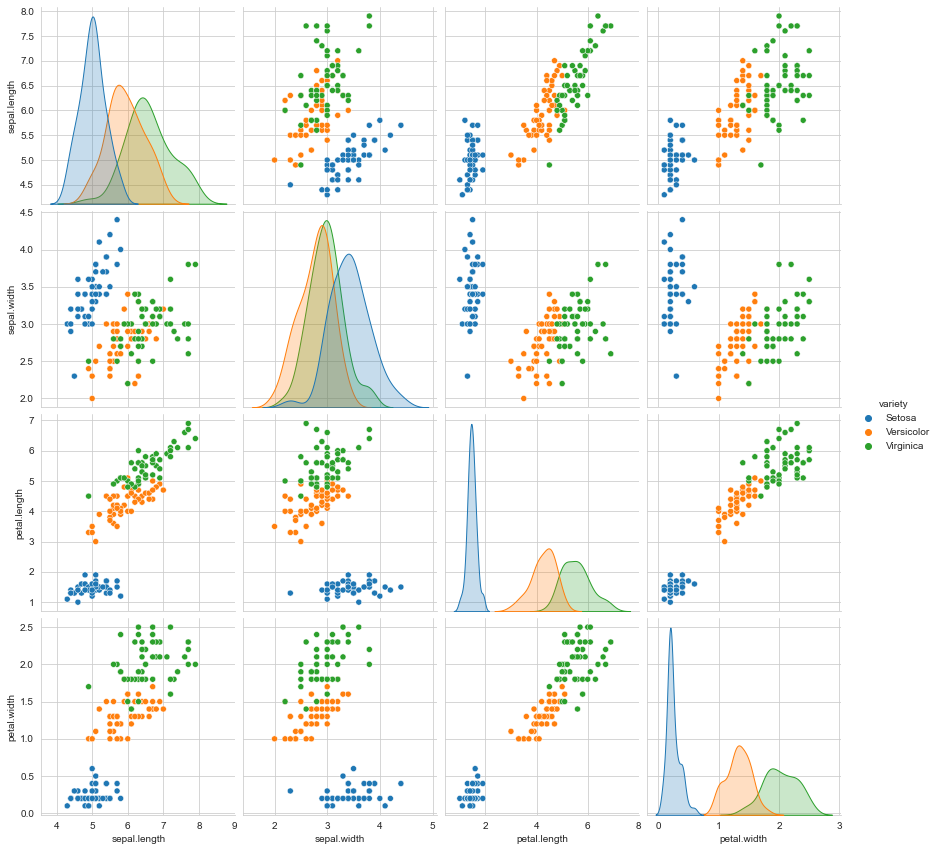

In [10]:
#pairwise scatter plot : Pair-Plot
#Dis-advantages : 
##CAn be used when number of features are high.
## Cannont visualize higher dimensional patterns in 3-D, 4-D.
## Only possible to view 2-D patterns

plt.close();
sns.set_style("whitegrid");
sns.pairplot(iris, hue = "variety", size = 3);
plt.show()

One thing that should be noted here is that we only have 6 unique plots in above pair plot. becuase the above plot is symmetric matrix. becuase we have one plot repeated twise. suppose PL and PW. there are two plots X : PL, y : PW
and X :PW, y : PL

One observation from above pair plot is . See in graph PL, PW : the setosa is very well sepreated and we can see easily that if(PL <= 2 and PW <= 1) flower_type = setosa

if(PW < 2 and PW >= 1 and PL < 5 and PL > 2.5) flower_type = versicolor
else flower_type = verginica


Observations : 
1. petal length and petal width are most useful features to indetify various flower types.
2. While setosa can be easily indentified(linearly separable), Verginica and Versicolor have some overlap.
3. WE can find lines and if-else conditions to build a simple model to classify the flower types.

# Limitations of Pair plots

In the above example we have just 4 features and hence 6 plots to look about. What if we have 10 or 100 or more features. Then it becomes very hard to go through all the plots. In those situation we need some other techniques which helps us visualize data . Like dimentionality reductions techniques and in Linear algebra we study about PCA and all that which helps us to visualize higher dimension data.

# Histogram, PDF, CDF

Till now we have seen how to visualize 2-D, 3-D and 4-D data(using pair plots). But we have never discussed about 1-D plots. So lets discuss them.

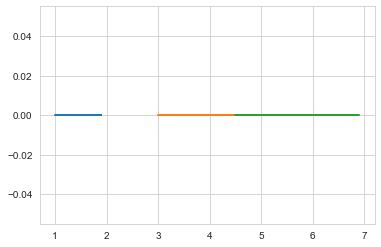

In [20]:
# What about 1-D scatter plot using just one feature ?
# 1-D scatter plot of petal - length

import numpy as np
iris_setosa = iris.loc[iris["variety"] == "Setosa"]
iris_verginica = iris.loc[iris["variety"] == "Virginica"]
iris_versicolor = iris.loc[iris["variety"] == "Versicolor"]


plt.plot(iris_setosa["petal.length"],np.zeros_like(iris_setosa['petal.length']))
plt.plot(iris_versicolor["petal.length"],np.zeros_like(iris_versicolor['petal.length']))
plt.plot(iris_verginica["petal.length"],np.zeros_like(iris_verginica['petal.length']))
plt.show()

As we can see it is very hard to gain information from the 1-D scatter plot. But if we plot a histogram of one feature where x axis is feature and y is count of the data point.

/Users/himanshupatel/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


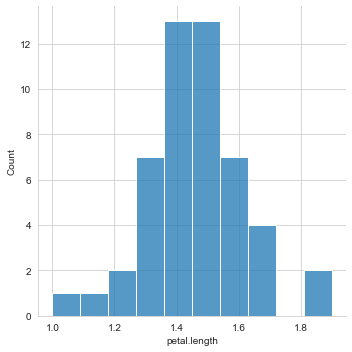

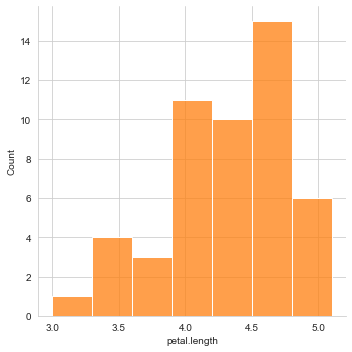

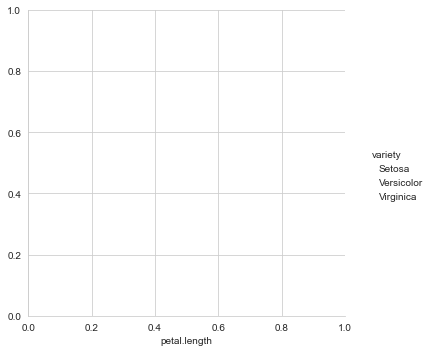

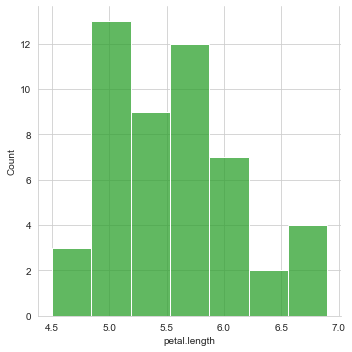

In [21]:
sns.FacetGrid(iris, hue = "variety", size = 5) \
   .map(sns.displot, "petal.length") \
   .add_legend();
plt.show();

Let see how we can use PDF or histogram to do univariate analysis. 

[0.02 0.02 0.04 0.14 0.26 0.26 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]


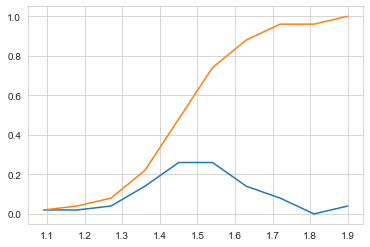

In [22]:
#Need for CDF
# We can visually see what percentage of versicolor flowers have a petal.length of less than 1.6?
# How to construct a CDF?
# How to read a CDF?

#Plot CDF of petal length
import numpy as np
count, bin_edges = np.histogram(iris_setosa['petal.length'], bins = 10, density = True)
pdf = count/(sum(count))
print(pdf)
print(bin_edges)

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

plt.show()

Now lets closely look at the above plot. Orange line is CDF and blue line is PDF. As we already know that PDF is calculated by smoothening of histograms. And at any point the value of PDF says how many flowers have that value.
For example : At 1.4 , PDF = 0.2 that means 20% of flowers have their petal length = 1.4

But on the same time you can see that at 1.4 the value of CDF is different. The value of CDF is commulative that means it tells about how many flowers have petal length less than equal to the given value.

For example : At 1.4, CDF = 2.7 that means 27% of flowers have their petal length <= 1.4

At any point CDF is integration of PDF till that point or we can say CDF is area under PDF curve from starting till that point.



# Mean, Variance and Standard Deviation

Let we have set of 50 observation of setosa petal length = {x1, x2, ... , xn}

Mean = Sum(x1, x2, x3...,xn) / 50
Mean have an limitation that is suppose if we have only one outlier which have very large number and that can make the average very large. Mean doesn't say anything about distribution its just tell the central value. And hence even a one mistake can increase or decrease the mean so drastically that we can make wrong assumptions.
For example suppose we already seen that petal length of setosa is 1-2 and hence its mean would lie between 1-2 suppose 1.5 but suppose someone wrongly entered a entry of petal length as 50. Now due to one wrong value mean will increase drastically and hence we can make wrong assumptions.

Variance : Variance tells us that how far the each point is from mean value. We calculate the distance from mean value and current point. The distance can be positive or negative hence we take square of the distance and take average.

Variance = Sum(x-mean)^2 / n

Standard Deviation : it is the square root of variance and tells the standard or we can say actual deviations of each point from mean value. Standard deviation is simple english can be considered as the spread of the curve. How wide the cruve is More the standard deviation more will be the spread.

In above plots of petal length, we can see that setosa have norrow curve hence its std-dev will be small becuse points are closer to mean vlaue. But versicolor and vergenica have wide curve becuase there are more points which are far from mean value.

Lets look at code

In [24]:
print("Means : ")
print(np.mean(iris_setosa['petal.length']))
#Mean with an outlier value 50
print(np.mean(np.append(iris_setosa['petal.length'],50)))
print(np.mean(iris_versicolor['petal.length']))
print(np.mean(iris_verginica['petal.length']))

print("\nStd-dev : ")
print(np.std(iris_setosa['petal.length']))
print(np.std(iris_versicolor['petal.length']))
print(np.std(iris_verginica['petal.length']))

Means : 
1.4620000000000002
2.4137254901960787
4.26
5.552

Std-dev : 
0.17191858538273286
0.4651881339845204
0.5463478745268441


You can clearly see that mean is 1.46 for setosa petal length but with an outlier of 50 mean changes to 2.4

You can also see that std-dev of setosa is smaller that means setosa petal lengths are closer to mean value and curve is less spread.

Note : Variance is also error prone to outlier that means a single outlier may corrupt variance.

# Median, Percentile, Quantile, IQR, MAD
We have seen that mean, variance, std can be corrupted easily with smaller number of outlier. So next question is, is there any thing similar to them which is less prone to error.

Median :  it is similar to mean.


Percentile : Let assume we have a sorted dataset of 100 values
x = {x1, x2, x3, ... ,x100}
median = (x50+x51)/2

Percentile is the position in sorted list. If percentile of some thing is 90 then its position in sorted data is 90th. 
That means about 90% of value are less than this value and 10% of values are more than this value.
Qunatiles : 25th, 50th, 75th and 100th percentile values are known as quantiles. first quantile is 25th percentile, second is 50th percentile, third is 75th percentile and 4th is 100th percentile.

Now lets look at the code

In [27]:
print("\nMedians : ")
print(np.median(iris_setosa['petal.length']))
#Median with outlier 50
print(np.median(np.append(iris_setosa['petal.length'], 50)))
print(np.median(iris_versicolor['petal.length']))
print(np.median(iris_verginica['petal.length']))

print("\nQnatiles : ")
print(np.percentile(iris_setosa['petal.length'], np.arange(0, 100, 25)))
print(np.percentile(iris_versicolor['petal.length'], np.arange(0, 100, 25)))
print(np.percentile(iris_verginica['petal.length'], np.arange(0, 100, 25)))

print("\n90thPercentile : ")
print(np.percentile(iris_setosa['petal.length'],90))
print(np.percentile(iris_versicolor['petal.length'],90))
print(np.percentile(iris_verginica['petal.length'],90))

from statsmodels import robust
print("\nMedian Absoulte Deviation")
print(robust.mad(iris_setosa['petal.length']))
print(robust.mad(iris_versicolor['petal.length']))
print(robust.mad(iris_verginica['petal.length']))


Medians : 
1.5
1.5
4.35
5.55

Qnatiles : 
[1.    1.4   1.5   1.575]
[3.   4.   4.35 4.6 ]
[4.5   5.1   5.55  5.875]

90thPercentile : 
1.7
4.8
6.3100000000000005

Median Absoulte Deviation
0.14826022185056031
0.5189107764769602
0.6671709983275211


As you can see that even after adding an outlier of 50 the median value is unaffected.
ge
Median Absoulte Deviation : It is similar to std-dev. In std-dev we took the square root of squared distance of each point from mean value. In MAD we take absolute distance of each point from median and take average.

IQR : Inter Qnatile range = 75th percentile - 25th percentile.

# Box Plots and Whiskers

We have already plotted the histograms of setosa and other petal lengths. One problem is that the histogram cannot answer the questions like what is 25th or 75th percentile. To solve this problem we use Box plots and whiskers.

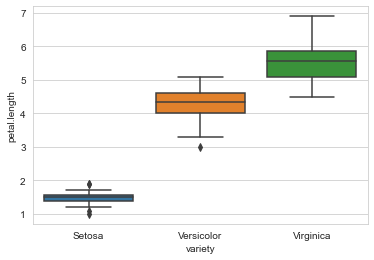

In [29]:
#Box plot with whiskers :  another method of visualizing the 1-D scatter plot
#The concept of median, percentile, quantile.
#How to draw the box in box-plot?
#How to draw whiskers : [no standard way] could use min and max or use other method 
#Idea like IQR

#Note : In the plot below, a technique call inter-quantile range is used in whishkers in the plot below donot corresponds
# to min and max values.

#Box plot can be visualized as PDF on side-ways.

sns.boxplot(x = "variety", y = "petal.length", data = iris)
plt.show()


Lets understand the box plot. In orange box the horizontal line in middle is 50th percentile. upper boundary of rectangle is 75th percentile and lower boundary is 25th percentile. The other two handles above and below the rectangle are caller wishkers. There is no standard way to draw the wishkers. so time we choose max and min value as wishkers. But in above plot wisherkers = 1.5 * IQR

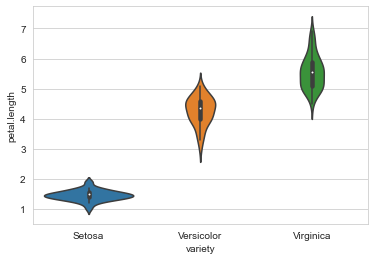

In [30]:
# A violin plot combines the benefits of the previous two plots and simplfies them.

# Denser regions of the data are fatter, and sparser ones thinner in a violin plot.

sns.violinplot(x = "variety", y = "petal.length", data = iris, size = 8)
plt.show()

Rectangle inside the figure is box plot and the curves on eithe side is the pdf.

# Multivariate PDF
We have seen 1-D PDF for petal lenght. Can we have 2-D, or more dimensional PDFs? The answer is yes.


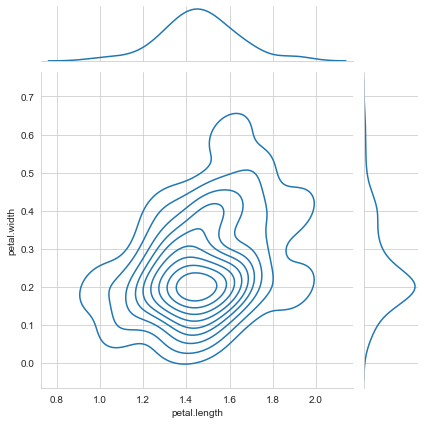

In [33]:
sns.jointplot(x = "petal.length", y = "petal.width", data = iris_setosa, kind = "kde")
plt.show()